# Employee Attrition Analysis and Prediction

### Problem Statement
Company X has an employee attrition/employee turnover problem. They are experiencing loss of employees. HR is seeking to understand why employees are leaving so as to come up with ways of retaining them. According to Statistics, The cost of employee turnover is up to 20% of that employee's salary. This means that if an employee was earning USD 100k, and they leave a company, it would cost that company up to USD 20k to replace that employee.

Cost include:
        
        Cost of off-boarding
        Cost of hiring (advertising, interviewing, hiring)
        Cost of onboarding a new person (training, management time)
        Lost productivity (a new person may take 1-2 years to reach the productivity of an existing person)

### Description of the Data
There are two sets of data: “Existing employees” and “Employees who have left”. Following attributes are available for every employee:

    Satisfaction Level
    Last evaluation
    Number of projects
    Average monthly hours
    Time spent at the company
    Whether they have had a work accident
    Whether they have had a promotion in the last 5 years
    Departments (column sales)
    Salary
    Whether the employee has left



### Objective
    To understand what factors contributed most to employee turnover/attrition.
    To perform clustering to find any meaningful patterns of employee traits.
    To create a model that predicts the likelihood if a certain employee will leave the company or not.
    To create or improve different retention strategies on targeted employees.
The implementation of this model will allow management to create better decision-making actions.

## Summary

Analysis of the data showed some amazing insights.

There were 4 features that contributed the most to employees leaving:

    1. Job satisfaction
    2. Last evaluation
    3. Number of Projects done
    4. Average monthly hours worked

There were 3 clusters of employees who left. 

    1. Employees who had low job satisfaction and high evaluation
    2. Employees who had low job satisfaction and low evaluation
    3. Employees who had high job satisfaction and high evaluation

The number of Projects done by each employee was also analyzed. It was seen that:
    
    Those who had less than 3 projects left
    About half of people who had between 4 to 5 projects left
    Those who had 6 projects and above left
There was generally an increase in turnover the more the projects were done or the fewer the projects were done

EDA also showed that:

    Sales, IT and Support had the highest attrition rates in the departments
    Employees who had less than 150 monthly hours left the company more
    Employees who worked between 170 to 230 hours stayed
    Employees who worked more than 250 hours left the company more
 
Overall, analysis showed that attrition rate is 23.8% and job satisfaction is the highest contributing factor/feature
    

#### Importing the libraries

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### load the data

In [2]:
df=pd.read_csv("C:\\Users\\User\\Desktop\\DSDJ\\Technical WorkShop Skills\\Full Projects\\EDA end to end HR analytics project\\HR-data.csv.txt")

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


#### Understanding the data

In [4]:
df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

In [5]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

## Exploratory Data Analysis

In [17]:
df.shape

(14999, 10)

In [18]:
# Calculate the turnover rate of our company's dataset. What's the rate of turnover?
turnover_rate = df.left.value_counts() / 14999
turnover_rate

0    0.761917
1    0.238083
Name: left, dtype: float64

In [3]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
turnover_Summary = df.groupby('left')
turnover_Summary.mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [6]:
turnover_Summary.std()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.217104,0.162005,0.979884,45.682731,1.562348,0.379991,0.159889
1,0.263933,0.197673,1.818165,61.202825,0.977698,0.212364,0.072759


### Feature Correlation

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


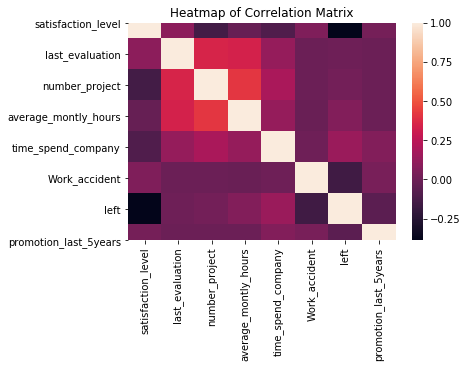

In [4]:
# Create a correlation matrix. What features correlate the most with turnover? 
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.title('Heatmap of Correlation Matrix')
corr

### Distribution of Employee Satisfaction, Evaluation and Project Count

Text(0, 0.5, 'Employee Count')

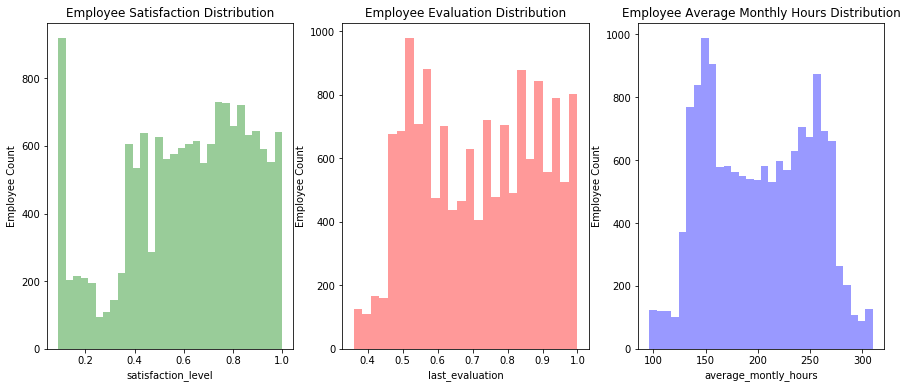

In [5]:
# Plot the distribution of Employee Satisfaction, Evaluation, and Project Count.

# Set up the matplotlib figure
f, axes = plt.subplots(ncols=3, figsize=(15, 6))

# Graph Employee Satisfaction
sns.distplot(df.satisfaction_level, kde=False, color="g", ax=axes[0]).set_title('Employee Satisfaction Distribution')
axes[0].set_ylabel('Employee Count')

# Graph Employee Evaluation
sns.distplot(df.last_evaluation, kde=False, color="r", ax=axes[1]).set_title('Employee Evaluation Distribution')
axes[1].set_ylabel('Employee Count')

# Graph Employee Average Monthly Hours
sns.distplot(df.average_montly_hours, kde=False, color="b", ax=axes[2]).set_title('Employee Average Monthly Hours Distribution')
axes[2].set_ylabel('Employee Count')

### Evaluating Satisfaction level vs Last Evaluation Score

#### There are 3 instances of people who left
##### 1. Low satisfaction and high evaluation
These employees are evidently good at their jobs and are hard workers, their evaluations are high. What could be causing low satisfaction?
##### 2. low satisfaction low evaluation
These employees are probably bad at their job and are not satisfied
##### 3. High satisfaction high evaluation
These are confusing. They show high satisfaction and performed well in their evaluation. 

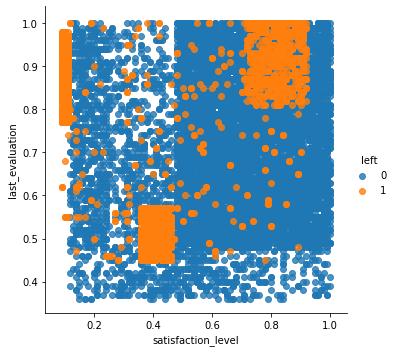

In [28]:
sns.lmplot(x='satisfaction_level', y='last_evaluation', data=df,
           fit_reg=False, # No regression line
           hue='left')   # Color by evolution stage

### Clusters of employees who left

We see 3 distinct clusters of employees that left as seen above:
    1. High perfoming Unsatisfied employees
    2. Low perfoming Unsatisfied employees
    3. High perfoming Satisfied employees

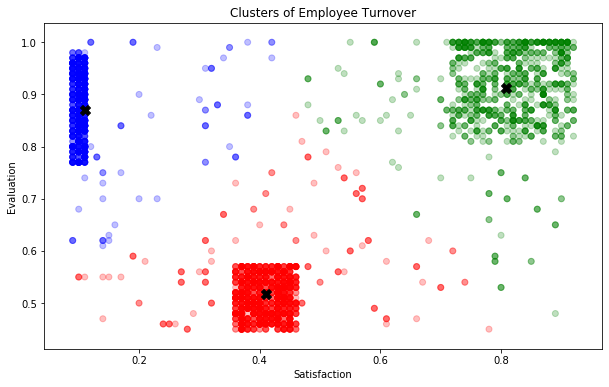

In [6]:
# Import KMeans Model
from sklearn.cluster import KMeans

# Graph and create 3 clusters of Employee Turnover
kmeans = KMeans(n_clusters=3,random_state=2)
kmeans.fit(df[df.left==1][["satisfaction_level","last_evaluation"]])

kmeans_colors = ['green' if c == 0 else 'blue' if c == 2 else 'red' for c in kmeans.labels_]

fig = plt.figure(figsize=(10, 6))
plt.scatter(x="satisfaction_level",y="last_evaluation", data=df[df.left==1],
            alpha=0.25,color = kmeans_colors)
plt.xlabel("Satisfaction")
plt.ylabel("Evaluation")
plt.scatter(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],color="black",marker="X",s=100)
plt.title("Clusters of Employee Turnover")
plt.show()

The distribution of employees who left because of satisfaction is in 3 modes
    1. Those who had very low satisfaction of 0.2 and less
    2. Those who had low satisfaction of between 0.2 and 0.5
    3. Those who had very high satisfaction of above 0.75

Text(0.5, 1.0, 'Employee Satisfaction Distribution - Turnover V.S. No Turnover')

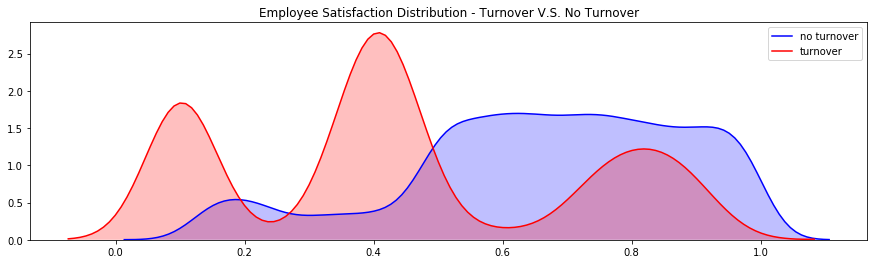

In [8]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['left'] == 0),'satisfaction_level'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(df.loc[(df['left'] == 1),'satisfaction_level'] , color='r',shade=True, label='turnover')
plt.title('Employee Satisfaction Distribution - Turnover V.S. No Turnover')

## Number of Projects
Those who had less than 3 projects left
About half of people who had between 4 to 5 projects left
Those who had 6 projects and above left
###### There is an increase in the rate of leaving with more projects working

[Text(0, 0.5, 'Percent')]

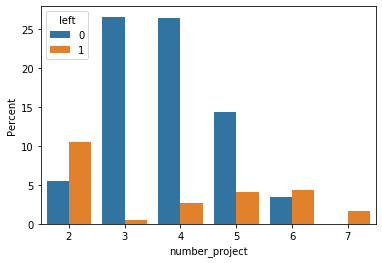

In [10]:
ax = sns.barplot(x="number_project", y="number_project", hue="left", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")

## Analysis of those who left by departments

In [12]:
hrleft = df[df['left']==1]

hrleft = pd.DataFrame(hrleft.sales.value_counts()).reset_index()
hrstay = pd.DataFrame(df.sales.value_counts()).reset_index()

hr_merge = pd.merge(hrleft, hrstay, how='inner', on='index')

hr_merge = hr_merge.rename(columns={"sales_x":'left', "sales_y":'stay', "index":'sales' })
hr_merge

,sales,left,stay
0,sales,1014,4140
1,technical,697,2720
2,support,555,2229
3,IT,273,1227
4,hr,215,739
5,accounting,204,767
6,marketing,203,858
7,product_mng,198,902
8,RandD,121,787
9,management,91,630


### Distribution of employees who left per department

Sales department had the highest turnover
Sales, Technical Support and support had the overall highest attrition

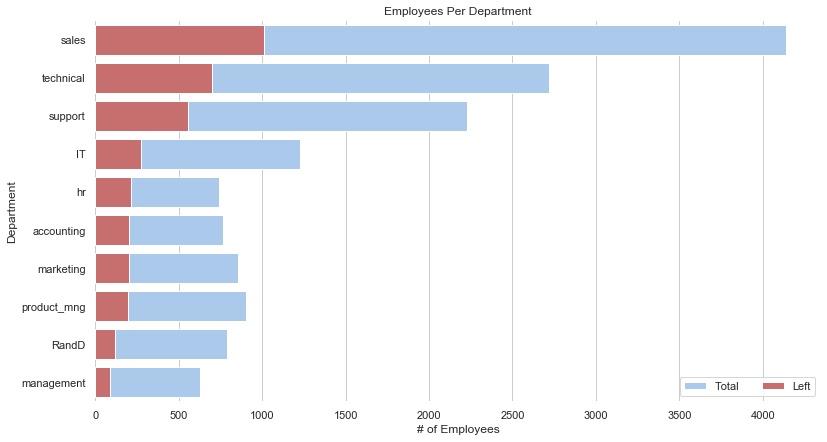

In [15]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(13, 7))

# Plot the total schools per city
sns.set_color_codes("pastel")
sns.barplot(x="stay", y='sales', data=hr_merge,
            label="Total", color="b")

# Plot the total community schools per city
sns.set_color_codes("muted")
sns.barplot(x="left", y="sales", data=hr_merge,
            label="Left", color="r")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set( ylabel="Department", title='Employees Per Department',
       xlabel="# of Employees")
sns.despine(left=True, bottom=True)

### Analysis of the distribution of monthly hours for those who left
    Employees who had less than 150 monthly hours left the company more
    Employees who worked between 170 to 230 hours stayed
    Employees who worked more than 250 hours left the company more

Text(0.5, 1.0, 'Employee AverageMonthly Hours Distribution - Turnover V.S. No Turnover')

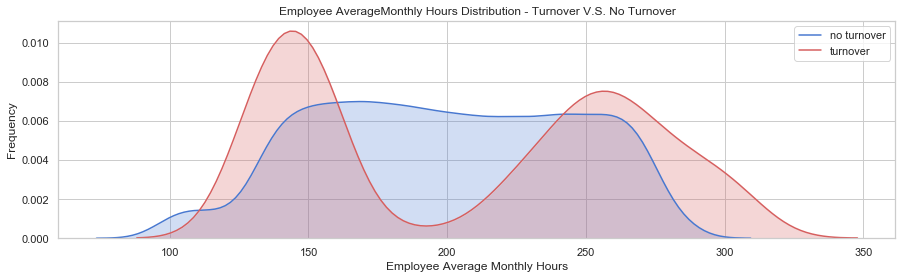

In [17]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['left'] == 0),'average_montly_hours'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(df.loc[(df['left'] == 1),'average_montly_hours'] , color='r',shade=True, label='turnover')
ax.set(xlabel='Employee Average Monthly Hours', ylabel='Frequency')
plt.title('Employee AverageMonthly Hours Distribution - Turnover V.S. No Turnover')

In [18]:
one_hot_1 = pd.get_dummies(df['sales'])
one_hot_2 = pd.get_dummies(df['salary'])

In [19]:
df = df.drop('sales',axis = 1)
df = df.drop('salary',axis = 1)

In [20]:
_enc = one_hot_2.join(one_hot_1)

In [21]:
df_enc = df.join(_enc)

### The Turnover or Attrition rate is 23%

In [24]:
df.left.value_counts(1)

0    0.761917
1    0.238083
Name: left, dtype: float64

Text(0, 0.5, 'Count')

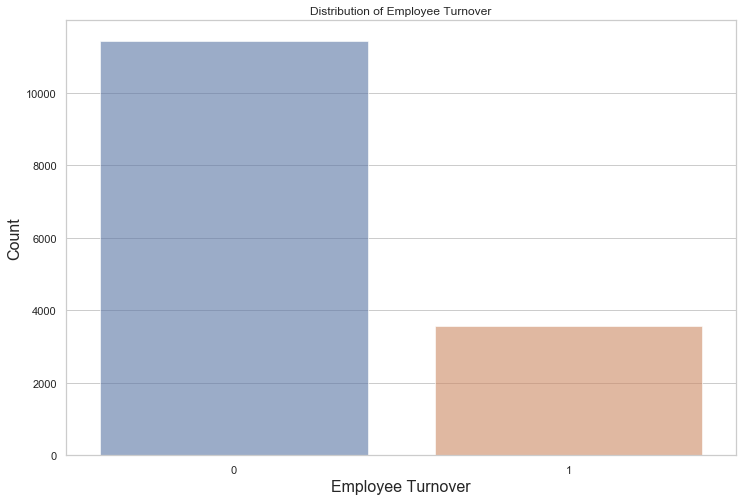

In [26]:
plt.figure(figsize=(12,8))
turnover = df.left.value_counts()
sns.barplot(y=turnover.values, x=turnover.index, alpha=0.6)
plt.title('Distribution of Employee Turnover')
plt.xlabel('Employee Turnover', fontsize=16)
plt.ylabel('Count', fontsize=16)

In [28]:
y = df_enc.left
X = df_enc.drop(['left'], axis=1)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### We train 3 models and compare their perfomances on the data

### Logistic Regression F1 (87%)

In [34]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

lr = LogisticRegression()

# Fit the model to the Upsampling data
lr = lr.fit(X_train, y_train)

print ("\n\n ---Logistic Regression Model---")
lr_auc = roc_auc_score(y_test, lr.predict(X_test))

print ("Logistic Regression AUC = %2.2f" % lr_auc)

lr2 = lr.fit(X_train, y_train)
print(classification_report(y_test, lr.predict(X_test)))

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)




 ---Logistic Regression Model---
Logistic Regression AUC = 0.63


C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.82      0.93      0.87      3462
           1       0.58      0.34      0.43      1038

    accuracy                           0.79      4500
   macro avg       0.70      0.63      0.65      4500
weighted avg       0.77      0.79      0.77      4500



### Random Forest F1(99%) Accuracy (96%)

In [35]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Model
rf = RandomForestClassifier()

rf_result = cross_val_score(rf, X_train, y_train, cv=5, scoring='f1')

rf_result.mean()

C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: Future

0.9681108690809616

In [36]:
from sklearn.metrics import roc_auc_score

rf = rf.fit(X_train, y_train)

print ("\n\n ---Random Forest Model---")
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
print ("Random Forest AUC = %2.2f" % rf_roc_auc)
print(classification_report(y_test, rf.predict(X_test)))

C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)




 ---Random Forest Model---
Random Forest AUC = 0.97
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3462
           1       0.99      0.95      0.97      1038

    accuracy                           0.99      4500
   macro avg       0.99      0.97      0.98      4500
weighted avg       0.99      0.99      0.99      4500



### Gradient Boost Classifier Accuracy (94%) F1 (99%)

In [37]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()  

gbc = gbc.fit(X_train,y_train)

gbc

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [39]:
gbc_result = cross_val_score(gbc, X_train, y_train, cv=5, scoring='f1')
gbc_result.mean()

0.9476934321109585

In [40]:
from sklearn.metrics import roc_auc_score

print ("\n\n ---Gradient Boosting Model---")
gbc_auc = roc_auc_score(y_test, gbc.predict(X_test))
print ("Gradient Boosting Classifier AUC = %2.2f" % gbc_auc)
print(classification_report(y_test, gbc.predict(X_test)))



 ---Gradient Boosting Model---
Gradient Boosting Classifier AUC = 0.96
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3462
           1       0.97      0.93      0.95      1038

    accuracy                           0.98      4500
   macro avg       0.97      0.96      0.97      4500
weighted avg       0.98      0.98      0.98      4500



### We use a ROC graph to compare the perfomance of the models

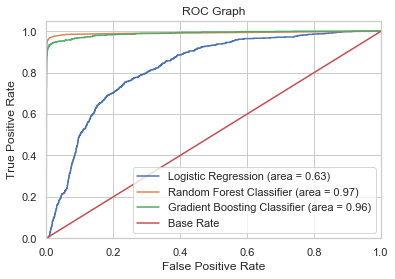

In [41]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
gbc_fpr, gbc_tpr, gbc_thresholds = roc_curve(y_test, gbc.predict_proba(X_test)[:,1])


plt.figure()

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % lr_auc)

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest Classifier (area = %0.2f)' % rf_roc_auc)

# Plot Decision Tree ROC
plt.plot(gbc_fpr, gbc_tpr, label='Gradient Boosting Classifier (area = %0.2f)' % gbc_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

### Feature Importances

In [48]:
# Get Feature Importances
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances = feature_importances.reset_index()
feature_importances.head()

,index,importance
0,satisfaction_level,0.305264
1,average_montly_hours,0.180019
2,time_spend_company,0.174435
3,number_project,0.163638
4,last_evaluation,0.126680


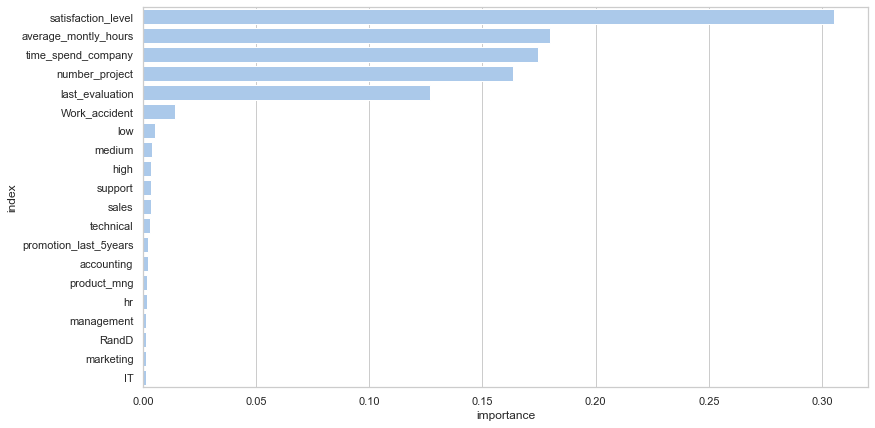

In [51]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(13, 7))

# Plot the Feature Importance
sns.set_color_codes("pastel")
sns.barplot(x="importance", y='index', data=feature_importances,
            label="Total", color="b")

### Applying some random noise on the Feature importances

C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


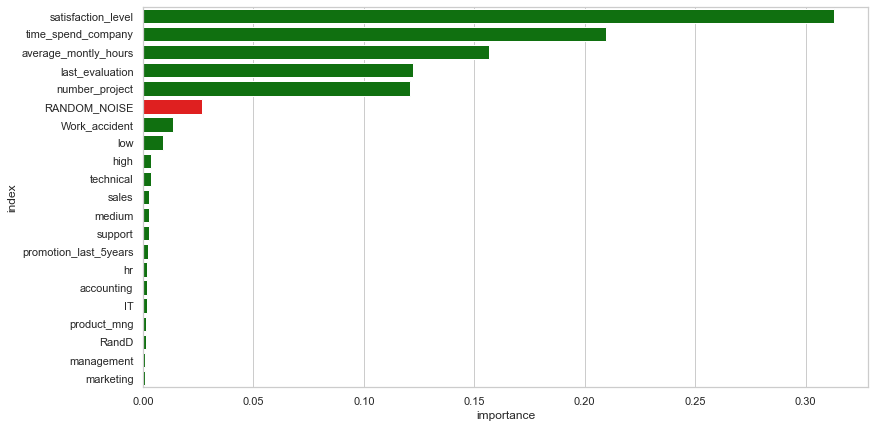

In [52]:
# Apply Random Noise to data set
X_train_rnoise = pd.DataFrame(X_train)
X_train_rnoise['RANDOM_NOISE'] = np.random.normal(0, 1, X_train_rnoise.shape[0])

# Fit Random Forest to DataSet
rf_random = RandomForestClassifier()
rf_random = rf_random.fit(X_train_rnoise, y_train)

# Get Feature Importances
feature_importances_random = pd.DataFrame(rf_random.feature_importances_, index = X_train_rnoise.columns,columns=['importance']).sort_values('importance', ascending=False)
feature_importances_random = feature_importances_random.reset_index()

# Create Seaborn PLot
sns.set(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(13, 7))


clrs = ['red' if (x == 5 ) else 'green' for x in feature_importances_random.index.values ]

# Plot the Feature Importance
sns.barplot(x="importance", y='index', data=feature_importances_random,
            label="Total",  palette=clrs)

# Conclusion

Employee satisfaction, number of projects done, evaluation and time spent with the company are the most important features that have been shown to affect turnover.The model can predict attrition or who is most likely to leave up to 94% accuracy

## Recomendations

Since we are dealing with people, it is a bit more complex. While the model may predict who is most likely to leave in the given period,in our employee retention problem, we would much rather have an estimate of the probability that he/she will leave the company. This is better because, if we are to predict attrition within a time frame, there is a possibility the employee may not leave within that time frame but leave later or not leave at all. But if we can just have a probabilty of leaving, then we can allocate resources, a budget or implement strategies targetted at those individuals whether by giving them more projects, more hours worked or changing departments.

##### 1. Rank employees according to likelihood of leaving then allocate a budget for incentives or develop programs or strategies to address their job satisfaction
##### 2. Start with instances of highest expected loss if the budget is tight (For high ranking employees)
